In [26]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [28]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [29]:
match1 = df2[(df2['team1'] == 'Mumbai Indians') & (df2['team2'] == 'Chennai Super Kings')]
match2 = df2[(df2['team1'] == 'Chennai Super Kings') & (df2['team2'] == 'Mumbai Indians')]

Match1 = Mumbai Home Ground

Match2 = Chennai Home Ground

# Overall Chennai vs Mumbai:

In [30]:
match = pd.concat((match1,match2))
match.head()

id  season            city        date           team1  \
117  118    2009       Cape Town  2009-04-18  Mumbai Indians   
161  162    2009  Port Elizabeth  2009-05-16  Mumbai Indians   
256  257    2011          Mumbai  2011-04-22  Mumbai Indians   
385  386    2013         Chennai  2013-04-06  Mumbai Indians   
429  430    2013          Mumbai  2013-05-05  Mumbai Indians   

                   team2          toss_winner toss_decision  result  \
117  Chennai Super Kings  Chennai Super Kings         field  normal   
161  Chennai Super Kings       Mumbai Indians           bat  normal   
256  Chennai Super Kings  Chennai Super Kings         field  normal   
385  Chennai Super Kings       Mumbai Indians           bat  normal   
429  Chennai Super Kings       Mumbai Indians           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
117           0       Mumbai Indians           19               0   
161           0  Chennai Super Kings            0               7   
256           0       Mumbai Indians            8               0   
385           0       Mumbai Indians            9               0   
429           0       Mumbai Indians           60               0   

     player_of_match                            venue          umpire1  \
117     SR Tendulkar                         Newlands      BR Doctrove   
161        ML Hayden                 St George's Park      SK Tarapore   
256  Harbhajan Singh                 Wankhede Stadium        Asad Rauf   
385       KA Pollard  MA Chidambaram Stadium, Chepauk        M Erasmus   
429       MG Johnson                 Wankhede Stadium  HDPK Dharmasena   

         umpire2 umpire3  
117  K Hariharan     NaN  
161   SJA Taufel     NaN  
256    AM Saheba     NaN  
385  VA Kulkarni     NaN  
429    CK Nandan     NaN

Matches played between Chennai and Mumbai.

In [31]:
match.shape

(28, 18)

In [32]:
match['winner'].value_counts()

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

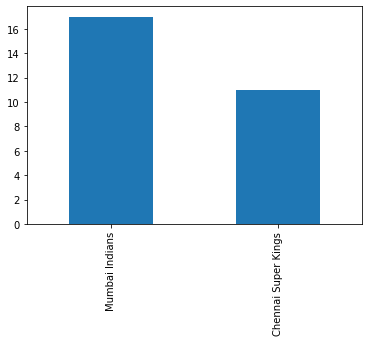

In [33]:
match['winner'].value_counts().plot.bar()
plt.show()

Chennai won 11 times and Mumbai won 17 times against each other.

In [34]:
match['toss_winner'].value_counts()

Mumbai Indians         15
Chennai Super Kings    13
Name: toss_winner, dtype: int64

In [35]:
match['toss_decision'].value_counts()

field    15
bat      13
Name: toss_decision, dtype: int64

In [36]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Mumbai Indians         10
Chennai Super Kings     6
Name: winner, dtype: int64

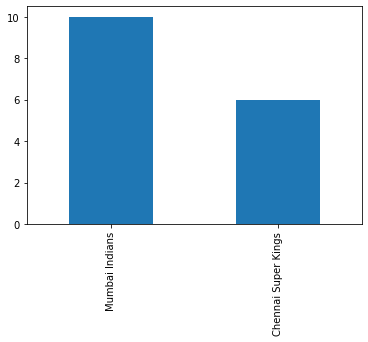

In [37]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Chennai won the toss and won the match 6 times whereas Mumbai 10 times. So toss played a vital role in the match we can say.

In [38]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team    bowling_team  over  ball  \
15486        67       1  Chennai Super Kings  Mumbai Indians     1     1   
15487        67       1  Chennai Super Kings  Mumbai Indians     1     2   
15488        67       1  Chennai Super Kings  Mumbai Indians     1     3   
15489        67       1  Chennai Super Kings  Mumbai Indians     1     4   
15490        67       1  Chennai Super Kings  Mumbai Indians     1     5   

        batsman non_striker      bowler  is_super_over  ...  bye_runs  \
15486  PA Patel   ML Hayden  SM Pollock              0  ...         0   
15487  PA Patel   ML Hayden  SM Pollock              0  ...         0   
15488  PA Patel   ML Hayden  SM Pollock              0  ...         0   
15489  PA Patel   ML Hayden  SM Pollock              0  ...         0   
15490  PA Patel   ML Hayden  SM Pollock              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
15486            0            0             0             0           1   
15487            0            0             0             0           0   
15488            0            0             0             0           0   
15489            0            0             0             0           0   
15490            0            0             0             4           0   

       total_runs  player_dismissed dismissal_kind fielder  
15486           1               NaN            NaN     NaN  
15487           0               NaN            NaN     NaN  
15488           0               NaN            NaN     NaN  
15489           0               NaN            NaN     NaN  
15490           4               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Chennai and Mumbai.

In [39]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many runs will De Kock score off boundaries in first 10 balls:

In [40]:
boundary_run_list = []
ids1 = delivery[delivery['batsman'].str.contains('Kock')]['match_id'].unique()
for j in ids1:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'Q de Kock')]['batsman_runs'])
    boundary_runs = 0
    if len(runs)>=10:
        for i in range(0,10):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    else:
        for i in range(len(runs)):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    boundary_run_list.append(boundary_runs)
print(boundary_run_list)

[4, 10, 8, 12]


These are the runs Quinton De Kock scored by boundaries in first 10 balls against Chennai.

In [41]:
avg_boundary_runs = np.mean(boundary_run_list)
avg_boundary_runs

8.5

Quinton De Kock scored 8 runs in an average against Chennai by boundaries in first 10 balls.

In [42]:
boundary_run_list_overall = []
ids2 = df1[df1['batsman'].str.contains('Kock')]['match_id'].unique()
for j in ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'Q de Kock')]['batsman_runs'])
    boundary_runs = 0
    if len(runs)>=10:
        for i in range(0,10):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    else:
        for i in range(len(runs)):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    boundary_run_list_overall.append(boundary_runs)
print(boundary_run_list_overall)

[0, 0, 4, 4, 8, 8, 4, 8, 0, 4, 12, 0, 4, 10, 4, 20, 8, 4, 0, 8, 4, 8, 6, 0, 0, 4, 4, 8, 12, 8, 4, 12, 8, 0, 14, 4, 12, 4, 6, 8, 10, 12, 4, 0, 10, 0, 8, 6, 8, 12]


These are the runs Quinton De Kock scored by boundaries in first 10 balls in overall IPL.

In [43]:
avg_boundary_runs_overall = np.mean(boundary_run_list_overall)
avg_boundary_runs_overall

6.12

Quinton De Kock scored 6 runs in an average in overall IPL by boundaries in first 10 balls.

In [44]:
boundary_run_list_overall_batting_first = []
ids3 = df1[(df1['batsman'] == 'Q de Kock') & (df1['inning'] == 1)]['match_id'].unique()
for j in ids3:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'Q de Kock') & (df1['inning'] == 1)]['batsman_runs'])
    boundary_runs = 0
    if len(runs)>=10:
        for i in range(0,10):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    else:
        for i in range(len(runs)):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    boundary_run_list_overall_batting_first.append(boundary_runs)
print(boundary_run_list_overall_batting_first)

[0, 4, 8, 4, 8, 0, 4, 10, 8, 0, 0, 4, 4, 12, 8, 0, 4, 12, 4, 6, 10, 4, 0, 10, 8, 12]


These are the runs Quinton De Kock scored by boundaries in first 10 balls in overall IPL while batting first.

In [45]:
avg_boundary_runs_overall_batting_first = np.mean(boundary_run_list_overall_batting_first)
avg_boundary_runs_overall_batting_first

5.538461538461538

Quinton De Kock scored 5 runs in an average in overall IPL by boundaries in first 10 balls while batting first.

In [46]:
boundary_run_list_overall_batting_second = []
ids4 = df1[(df1['batsman'] == 'Q de Kock') & (df1['inning'] == 2)]['match_id'].unique()
for j in ids4:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'Q de Kock') & (df1['inning'] == 2)]['batsman_runs'])
    boundary_runs = 0
    if len(runs)>=10:
        for i in range(0,10):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    else:
        for i in range(len(runs)):
            if runs[i] == 4 or runs[i] == 6:
                boundary_runs += runs[i]
    boundary_run_list_overall_batting_second.append(boundary_runs)
print(boundary_run_list_overall_batting_second)

[0, 4, 8, 4, 12, 0, 4, 20, 4, 8, 4, 8, 6, 0, 8, 12, 8, 4, 14, 8, 12, 0, 6, 8]


These are the runs Quinton De Kock scored by boundaries in first 10 balls in overall IPL while batting second.

In [47]:
avg_boundary_runs_overall_batting_second = np.mean(boundary_run_list_overall_batting_second)
avg_boundary_runs_overall_batting_second

6.75

Quinton De Kock scored 6 runs in an average in overall IPL by boundaries in first 10 balls while batting second.

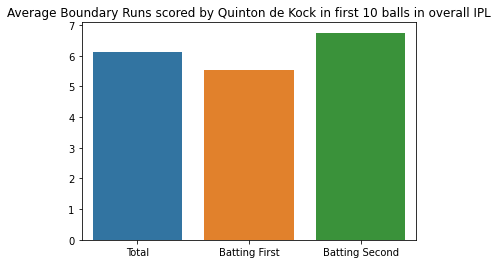

In [48]:
average_boundary_runs = pd.Series([avg_boundary_runs_overall,avg_boundary_runs_overall_batting_first,avg_boundary_runs_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_boundary_runs.index , y = average_boundary_runs)
plt.title('Average Boundary Runs scored by Quinton de Kock in first 10 balls in overall IPL')
plt.show()

Quinton de Kock scored 5-6 runs by boundaries in first 10 balls in overall IPL.

## Which MI bowler has the best dot balls to total balls ratio:

In [49]:
ratio_list = []
bowlers = delivery[(delivery['match_id'] == 11151) & (delivery['bowling_team'] == 'Mumbai Indians')]['bowler'].unique()
for j in bowlers:
    batsman_runs = list(delivery[delivery['bowler'] == j]['batsman_runs'])
    wide_balls = list(delivery[delivery['bowler'] == j]['wide_runs'])
    no_balls = list(delivery[delivery['bowler'] == j]['noball_runs'])
    legal_balls = 0
    dot_balls = 0
    for i in range(len(batsman_runs)):
        if (batsman_runs[i] == 0) & (wide_balls[i] == 0) & (no_balls[i] == 0):
            dot_balls += 1
        if wide_balls[i] != 0:
            legal_balls -= 1
        elif no_balls[i] != 0:
            legal_balls -= 1
        else:
            legal_balls += 1
    dot_balls_by_legal_balls = (dot_balls/legal_balls)*100
    ratio_list.append((j,dot_balls_by_legal_balls))
ratio_list

[('J Behrendorff', 60.86956521739131),
 ('SL Malinga', 46.389496717724285),
 ('HH Pandya', 44.354838709677416),
 ('JJ Bumrah', 43.50282485875706),
 ('RD Chahar', 45.78313253012048),
 ('KH Pandya', 50.53763440860215)]

In [69]:
ratio_dict = {}
bowlers = ['HH Pandya','JJ Bumrah','RD Chahar','KH Pandya','KA Pollard']
for j in bowlers:
    batsman_runs = list(delivery[delivery['bowler'] == j]['batsman_runs'])
    wide_balls = list(delivery[delivery['bowler'] == j]['wide_runs'])
    no_balls = list(delivery[delivery['bowler'] == j]['noball_runs'])
    total_balls = list(delivery[(delivery['bowler'] == j)]['ball'])
    legal_balls = len(total_balls)
    dot_balls = 0
    for i in range(len(batsman_runs)):
        if (batsman_runs[i] == 0) & (wide_balls[i] == 0) & (no_balls[i] == 0):
            dot_balls += 1
        if wide_balls[i] != 0:
            legal_balls -= 1
        elif no_balls[i] != 0:
            legal_balls -= 1
    dot_balls_by_legal_balls = (dot_balls/legal_balls)*100
    ratio_dict[j] = dot_balls_by_legal_balls
ratio_dict

{'HH Pandya': 41.66666666666667,
 'JJ Bumrah': 41.84782608695652,
 'RD Chahar': 45.23809523809524,
 'KH Pandya': 48.95833333333333,
 'KA Pollard': 27.23404255319149}

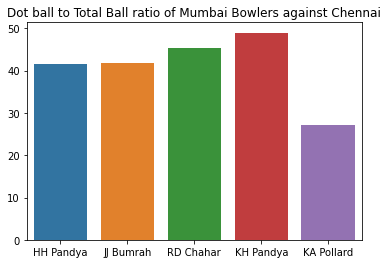

In [70]:
ratio = pd.Series(list(ratio_dict.values()),index = list(ratio_dict.keys()))
sns.barplot(x = ratio.index, y = ratio)
plt.title('Dot ball to Total Ball ratio of Mumbai Bowlers against Chennai')
plt.show()

Krunal Pandya has the highest dot ball to total ball ratio among Mumbai bowlers.

In [72]:
ratio_dict_overall = {}
bowlers = ['HH Pandya','JJ Bumrah','RD Chahar','KH Pandya','KA Pollard','TA Boult']
for j in bowlers:
    batsman_runs = list(df1[df1['bowler'] == j]['batsman_runs'])
    wide_balls = list(df1[df1['bowler'] == j]['wide_runs'])
    no_balls = list(df1[df1['bowler'] == j]['noball_runs'])
    total_balls = list(df1[(df1['bowler'] == j)]['ball'])
    legal_balls = len(total_balls)
    dot_balls = 0
    for i in range(len(batsman_runs)):
        if (batsman_runs[i] == 0) & (wide_balls[i] == 0) & (no_balls[i] == 0):
            dot_balls += 1
        if wide_balls[i] != 0:
            legal_balls -= 1
        elif no_balls[i] != 0:
            legal_balls -= 1
    dot_balls_by_legal_balls = (dot_balls/legal_balls)*100
    ratio_dict_overall[j] = dot_balls_by_legal_balls
ratio_dict_overall

{'HH Pandya': 34.177215189873415,
 'JJ Bumrah': 38.598506605399194,
 'RD Chahar': 43.20987654320987,
 'KH Pandya': 32.38095238095238,
 'KA Pollard': 28.523769808173476,
 'TA Boult': 38.954248366013076}

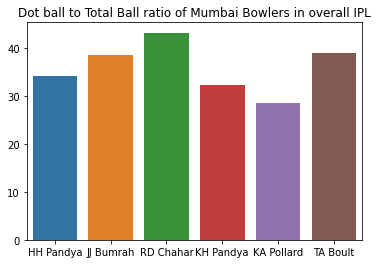

In [73]:
ratio_overall = pd.Series(list(ratio_dict_overall.values()),index = list(ratio_dict_overall.keys()))
sns.barplot(x = ratio_overall.index, y = ratio_overall)
plt.title('Dot ball to Total Ball ratio of Mumbai Bowlers in overall IPL')
plt.show()

Rahul Chahar has the highest dot ball to total ball ratio among Mumbai bowlers in overall IPL till now.

## How many such overs will be there,where a 6 and 4 are scored in the same over.

In [54]:
over_dict = {}
for j in ids:
    for k in range(20):
        batsman_runs_first_inning = list(delivery[(delivery['match_id'] == j) & (delivery['over'] == k) & (delivery['inning'] == 1)]['batsman_runs'])
        six1 = 0
        four1 = 0
        over1 = 0
        for i in batsman_runs_first_inning:
            if i == 6:
                six1 += 1
            if i == 4:
                four1 += 1
        if six1 >= 1 and four1 >=1:
            over1 +=1
        batsman_runs_second_inning = list(delivery[(delivery['match_id'] == j) & (delivery['over'] == k) & (delivery['inning'] == 2)]['batsman_runs'])
        six2 = 0
        four2 = 0
        over2 = 0
        for i in batsman_runs_second_inning:
            if i == 6:
                six2 += 1
            if i == 4:
                four2 += 1
        if six2 >= 1 and four2 >=1:
            over2 +=1
    over_dict[j] = over1+over2
print(over_dict)

{118: 0, 162: 0, 257: 0, 386: 0, 430: 0, 457: 0, 470: 0, 490: 0, 515: 1, 530: 0, 573: 1, 576: 0, 7894: 1, 11151: 0, 11335: 0, 11415: 0, 67: 0, 96: 0, 194: 1, 211: 0, 234: 0, 308: 0, 355: 0, 379: 2, 454: 0, 559: 1, 7920: 0, 11412: 0}


So out of 28 matches only in 5 matches there was 1 over where 6 and 4 was hit and in only 1 match there was 2 overs where 6 and 4 was hit in a match between Chennai and Mumbai.. 

## Calculate BLS(Bowler Lethality Score):

In [109]:
bls_dict = {}
bowlers = ['HH Pandya','JJ Bumrah','RD Chahar','KH Pandya','KA Pollard','TA Boult','KV Sharma','SN Thakur','DL Chahar','Imran Tahir','RA Jadeja','S Curran']
for k in ids:
    bls_list = []
    for j in bowlers:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['batsman_runs'])
        wide_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        no_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        total_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        dot_balls = 0
        six = 0
        four = 0
        boundary_runs = 0
        boundary_count = 0
        for i in range(len(batsman_runs)):
            if (batsman_runs[i] == 0) & (wide_balls[i] == 0) & (no_balls[i] == 0):
                dot_balls += 1
            if wide_balls[i] != 0:
                legal_balls -= 1
            elif no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] == 4 or batsman_runs[i] == 6:
                boundary_runs += batsman_runs[i]
                boundary_count += 1
        wickets = delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j) & (delivery['dismissal_kind'] != 'run out')]['player_dismissed'].count()
        if legal_balls>0 and boundary_count>0:
            bls = ((wickets+dot_balls - (boundary_runs/boundary_count))/legal_balls)
        else:
            bls = -999
        if bls != -999:
            bls_list.append(bls)
            if j not in bls_dict:
                bls_dict[j] = bls_list
            else:
                bls_dict[j].append(bls)
for k,v in bls_dict.items():
    bls_dict[k] = np.mean(v)
bls_dict

{'KA Pollard': -0.049740961199294526,
 'RA Jadeja': 0.006808688387635757,
 'JJ Bumrah': 0.2164556277056277,
 'HH Pandya': 0.1638888888888889,
 'DL Chahar': 0.20909238909238909,
 'Imran Tahir': 0.20909238909238909,
 'RD Chahar': 0.2614484126984127,
 'KH Pandya': 0.2614484126984127,
 'SN Thakur': 0.2614484126984127}

So we can see Rahul Chahar , Krunal Pandya and Shardul Thakur has the highest BLS.